# WAVLET.PY

#### Python wavelet anaysis code based on the code in [IDL and MATLAB](http://paos.colorado.edu/research/wavelets/software.html) language written by Christopher Torrence and [PYTHON 2](http://paos.colorado.edu/research/wavelets/software.html) language written by Evgeniya Predybaylo.

The wavelet code for PYTHON written by Evgeniya Predybaylo only can use in PYTHON 2 and has some errors.
Also there is another wavlet code [PIWavelet](http://duducosmos.github.io/PIWavelet/).
Unfortunately it is also based on the PYTHON 2, and the inverse wavelet method has different normalization with Torrence's one. In addition its runtime is much longer than Predybaylo's [PYTHON code](http://paos.colorado.edu/research/wavelets/software.html) or Torrence's [IDL code](http://paos.colorado.edu/research/wavelets/software.html).
To avoid these errors and run also in PYTHON 3, we need the revised the previous wavelet code.
Here, we provide the new PYTHON code which is slightly faster than Predybaylo's code and catch the erros.

### Development
Author : Juhyeong Kang

Date  : Sep 2016

Email : jhkang@astro.snu.ac.kr

# Wavelet

Computes the wavelet transfor of the timeseries with sampling time dt.

By default, the Molet nonorthogonal wavlet function with k0=6 is used.
The wavelet basis is normalized to have total energy=1 at all sacles.

### Syntax

wave, period, scale, coi = wavelet(y,dt,dj=0.25,s0=False,j=False,mother='MORLET',param=False,pad=False)

signif = wave_signif(y,dt,scale,sigtest=0,mother='MORLET',param=False,lag1=0.0,siglvl=0.95,dof=-1,gws=False,confidence=False)

## Setting

In [1]:
matplotlib inline

In [2]:
import glob

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib import ticker

In [6]:
from fisspy.analysis.wavelet import wavelet, wave_signif

In [7]:
file=glob.glob('*.dat')

In [8]:
y=np.loadtxt(file[0])

In [9]:
var=np.var(y,ddof=1)

In [10]:
sst=(y-y.mean())/var**0.5

In [11]:
n=len(sst)
dt=0.25
time=np.arange(n)*dt+1871.
xlim=[int(np.round(time[0],-1)),int(np.round(time[-1],-1))]
dj=0.25
s0=2*dt
j1 = int(7/dj)
lag1 = 0.72
mother = 'Morlet'
pad =True

## Wavelet transform

In [12]:
wave, period, scale, coi = wavelet(sst,dt,dj,s0,j1,mother,pad=pad)

In [13]:
wave.shape

(29, 504)

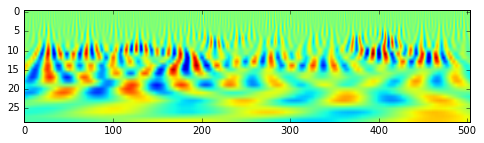

In [14]:
plt.figure(figsize=(8,2))
plt.imshow(wave.real,aspect='auto')

In [15]:
power=np.abs(wave)**2

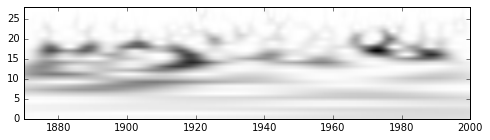

In [16]:
plt.figure(figsize=(8,2))
plt.imshow(power.real,aspect='auto',cmap=plt.cm.gray_r,extent=[xlim[0],xlim[1],0,28])

## Significance

Significance levels (var=1 for the normalized sst)

In [17]:
signif = wave_signif(1.0,dt,scale,sigtest=0,mother=mother,lag1=lag1)

In [18]:
sig95=signif[:,np.newaxis]*np.ones(n)
sig95 = power / sig95

Global wavelet function and significance levels

In [19]:
gws=var*(power.sum(axis=1)/n)

In [20]:
dof = n - scale

In [21]:
gsig = wave_signif(var,dt,scale,sigtest=1,lag1=lag1,dof=dof,mother=mother)

Scale-average netween El Nino periods of 2-8 years

In [22]:
avg=(scale>=2)*(scale<=8)
cdelta = 0.776
scale_avg = scale[:,np.newaxis]*np.ones(n)
scale_avg = power/scale_avg
scale_avg = var*dj*dt/cdelta*scale_avg[avg,:].sum(axis=0)

In [23]:
savgsig = wave_signif(var,dt,scale,sigtest=2,lag1=lag1,dof=[2,7.9],mother=mother)

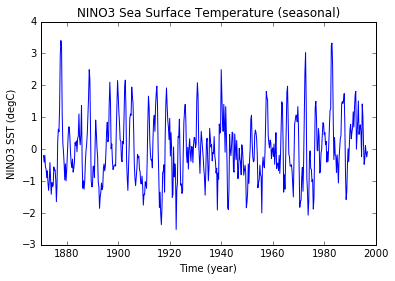

In [24]:
plt.plot(time,sst)
plt.xlim(xlim)
plt.xlabel('Time (year)')
plt.ylabel('NINO3 SST (degC)')
plt.title('NINO3 Sea Surface Temperature (seasonal)')

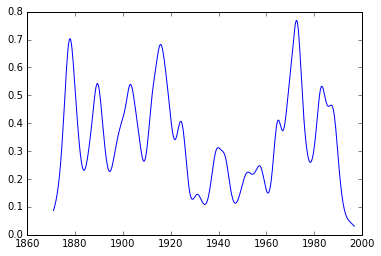

In [25]:
plt.plot(time,scale_avg)

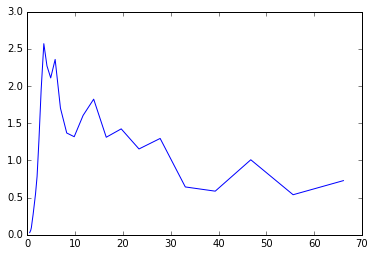

In [26]:
plt.plot(period,gws)

In [29]:
levels = [0,1,2, 5,  10,20]

Contour plot wavelet power spectrum

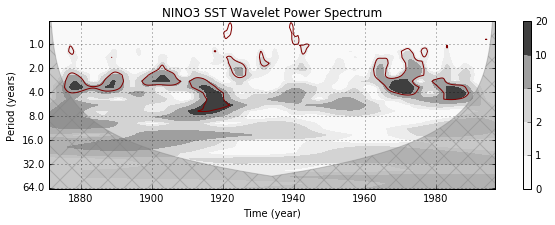

In [32]:
plt.figure(figsize=(10,3))
cmap=plt.cm.gray_r
cs=plt.contourf(time, period[:],power, len(levels),cmap=cmap)
im=plt.contourf(cs,levels=levels,cmap=cmap)
plt.contour(time,period[:],sig95,[-99,1],color='k')
plt.fill_between(time,coi,period.max(),color='grey',alpha=0.4,hatch='x')
plt.ylim([period.max(),period.min()])
plt.yscale('log',basey=2)
plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
ax=plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt.ticklabel_format(axis='y',style='plain')
plt.title('NINO3 SST Wavelet Power Spectrum')
plt.colorbar(im)
plt.grid()

The red contour is the 95% confidence level(red noise $\alpha$=0.72). This result is same as Figure 11.(a) of Torrence & Compo ([1998](http://paos.colorado.edu/research/wavelets/bams_79_01_0061.pdf))

# Reference

Torrence, C. and G. P. Compo, 1998, <I>A Practical Guid to Wavelet Analysis</I>. [BAMS, 79, 64-78.](http://paos.colorado.edu/research/wavelets/bams_79_01_0061.pdf)

In [17]:
power.max()

17.267103739504147